In [1]:
from astropy.io import fits
import numpy as np
import astropy
import sys; import os
import astropy.units as u
from astropy.cosmology import Planck18 as cosmo
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import rcParams
rcParams['font.family'] = 'Helvetica'
rcParams['text.usetex'] = 'False'
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
rcParams['figure.facecolor'] = 'white'
from astropy.io import ascii
from astropy.table import Table
from matplotlib import gridspec
import matplotlib
from glob import glob
from astropy.wcs import WCS
from astropy.visualization import LinearStretch, LogStretch, ImageNormalize, ZScaleInterval





/Users/kedar/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
fermi_4fgl_dr4_14yr_cat = Table.read('gll_psc_v35.fit',format='fits',hdu=1) ##https://fermi.gsfc.nasa.gov/ssc/data/access/lat/14yr_catalog/


In [3]:
fermi_4fgl_dr4_14yr_cat.keys()

['Source_Name',
 'DataRelease',
 'RAJ2000',
 'DEJ2000',
 'GLON',
 'GLAT',
 'Conf_68_SemiMajor',
 'Conf_68_SemiMinor',
 'Conf_68_PosAng',
 'Conf_95_SemiMajor',
 'Conf_95_SemiMinor',
 'Conf_95_PosAng',
 'ROI_num',
 'Extended_Source_Name',
 'Signif_Avg',
 'Pivot_Energy',
 'Flux1000',
 'Unc_Flux1000',
 'Energy_Flux100',
 'Unc_Energy_Flux100',
 'SpectrumType',
 'PL_Flux_Density',
 'Unc_PL_Flux_Density',
 'PL_Index',
 'Unc_PL_Index',
 'LP_Flux_Density',
 'Unc_LP_Flux_Density',
 'LP_Index',
 'Unc_LP_Index',
 'LP_beta',
 'Unc_LP_beta',
 'LP_SigCurv',
 'LP_EPeak',
 'Unc_LP_EPeak',
 'PLEC_Flux_Density',
 'Unc_PLEC_Flux_Density',
 'PLEC_IndexS',
 'Unc_PLEC_IndexS',
 'PLEC_ExpfactorS',
 'Unc_PLEC_ExpfactorS',
 'PLEC_Exp_Index',
 'Unc_PLEC_Exp_Index',
 'PLEC_SigCurv',
 'PLEC_EPeak',
 'Unc_PLEC_EPeak',
 'Npred',
 'Flux_Band',
 'Unc_Flux_Band',
 'nuFnu_Band',
 'Sqrt_TS_Band',
 'Variability_Index',
 'Frac_Variability',
 'Unc_Frac_Variability',
 'Signif_Peak',
 'Flux_Peak',
 'Unc_Flux_Peak',
 'Time_Pea

In [12]:
fermi_ra = fermi_4fgl_dr4_14yr_cat['RAJ2000']
fermi_dec = fermi_4fgl_dr4_14yr_cat['DEJ2000']
fermi_sn = fermi_4fgl_dr4_14yr_cat['Source_Name']
fermi_c95_smaj = fermi_4fgl_dr4_14yr_cat['Conf_95_SemiMajor']
fermi_f1000 = fermi_4fgl_dr4_14yr_cat['Flux1000']
fermi_f1000_unc = fermi_4fgl_dr4_14yr_cat['Unc_Flux1000']


(array([4.583e+03, 1.811e+03, 4.740e+02, 1.410e+02, 5.500e+01, 2.200e+01,
        1.000e+01, 3.000e+00, 3.000e+00, 3.000e+00]),
 array([ 0.43800002,  5.5812    , 10.7244    , 15.8675995 , 21.0108    ,
        26.154     , 31.2972    , 36.4404    , 41.5836    , 46.7268    ,
        51.87      ], dtype=float32),
 <BarContainer object of 10 artists>)

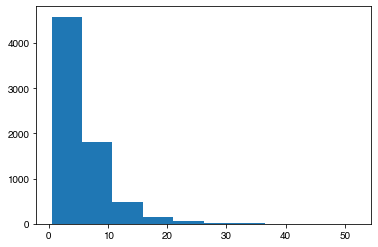

In [15]:
plt.hist(fermi_c95_smaj*60)

In [7]:
spt_sz_cat = Table.read('Everett20_SPT-SZ_PS_catalog_v3.dat',format='ascii') 


In [8]:
spt_sz_cat.keys()

['SPT ID',
 'RA',
 'DEC',
 'S/N (95 GHz)',
 'S_raw (95 GHz) [mJy]',
 'S_best (95 GHz) [mJy]',
 'dS_up (95 GHz) [mJy]',
 'dS_down (95 GHz) [mJy]',
 'S/N (150 GHz)',
 'S_raw (150 GHz) [mJy]',
 'S_best (150 GHz) [mJy]',
 'dS_up (150 GHz) [mJy]',
 'dS_down (150 GHz) [mJy]',
 'S/N (220 GHz)',
 'S_raw (220 GHz) [mJy]',
 'S_best (220 GHz) [mJy]',
 'dS_up (220 GHz) [mJy]',
 'dS_down (220 GHz) [mJy]',
 'alpha(95,150)_raw',
 'alpha(95,150)_best',
 'd_alpha(95,150)_up',
 'd_alpha(95,150)_down',
 'alpha(150,220)_raw',
 'alpha(150,220)_best',
 'd_alpha(150,220)_up',
 'd_alpha(150,220)_down',
 'P[alpha(150,220)>1.51]',
 'Type',
 'External catalogs',
 'Extended',
 'Redshift',
 'Cut selection']

In [26]:
spt_ra = spt_sz_cat['RA']
spt_dec = spt_sz_cat['DEC']
spt_95 = spt_sz_cat['S_best (95 GHz) [mJy]']
spt_150 = spt_sz_cat['S_best (150 GHz) [mJy]']
spt_220 = spt_sz_cat['S_best (220 GHz) [mJy]']
spt_95_150_si = spt_sz_cat['alpha(95,150)_best']
spt_name = spt_sz_cat['SPT ID']
spt_150_220_si = spt_sz_cat['alpha(150,220)_best']
spt_95_sn = spt_sz_cat['S/N (95 GHz)']
spt_150_sn = spt_sz_cat['S/N (150 GHz)']
spt_220_sn = spt_sz_cat['S/N (220 GHz)']


In [45]:
spt_max_sn = np.zeros_like(spt_150_sn)
for i in range(len(spt_150_sn)):
    spt_max_sn[i] = np.max([spt_95_sn[i],spt_150_sn[i],spt_220_sn[i]])

In [46]:
spt_dec_err = np.sqrt(4.3**2 + (72/spt_max_sn)**2)
spt_ra_err = np.sqrt((4.6/np.cos(spt_dec*np.pi/180.0))**2 + (72/spt_max_sn)**2)

In [79]:
spt_dec_err.name = 'DEC_err (arcsec)'
spt_ra_err.name = 'RA_err  (arcsec)'
spt_max_sn.name = 'Max SNR'

(array([614., 335., 340., 316., 327., 400., 400., 582., 927., 604.]),
 array([ 4.30005219,  5.52569553,  6.75133888,  7.97698222,  9.20262557,
        10.42826891, 11.65391225, 12.8795556 , 14.10519894, 15.33084229,
        16.55648563]),
 <BarContainer object of 10 artists>)

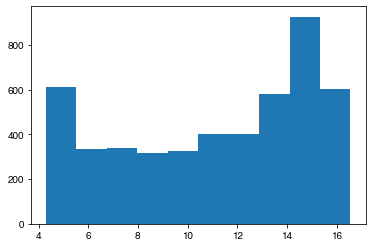

In [80]:
plt.hist(spt_dec_err)

(array([247., 401., 454., 442., 459., 473., 590., 908., 712., 159.]),
 array([ 6.0109515 ,  7.30568716,  8.60042282,  9.89515848, 11.18989414,
        12.4846298 , 13.77936546, 15.07410112, 16.36883678, 17.66357244,
        18.9583081 ]),
 <BarContainer object of 10 artists>)

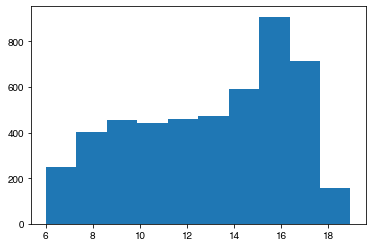

In [81]:
plt.hist(spt_ra_err)

In [84]:
spt_ra_err

16.812299751883693
15.619574381591917
16.231083731847875
16.473162923242253
8.523662410270427
15.423524122146665
15.79965078962984
16.907126619483176
15.77338037555435
17.14265378634572
14.578214924515297


In [85]:
spt_sz_cat_new = Table([spt_name,spt_ra,spt_ra_err,spt_dec,spt_dec_err,spt_95,spt_150,spt_220,spt_95_sn,spt_150_sn,spt_220_sn,spt_95_150_si,spt_150_220_si]) 

In [96]:
#spt_hdr['SKYAREA'] = 2500.0

In [88]:
spt_sz_cat_new.meta

OrderedDict()

In [90]:
ra_pad = 2.0
dec_pad = 2.0

spt_ra_bounds = np.nanmax(spt_ra[spt_ra <180])+ra_pad,np.nanmin(spt_ra[spt_ra>180])-ra_pad
spt_dec_bounds = np.nanmax(spt_dec)+dec_pad,np.nanmin(spt_dec)-dec_pad
print(spt_ra_bounds,spt_dec_bounds)

(106.87451, 298.05331) (-37.78931, -67.301392)


In [91]:
fermi_common_ra = fermi_ra[np.logical_or(fermi_ra<spt_ra_bounds[0],fermi_ra>spt_ra_bounds[1])]
fermi_common_dec = fermi_dec[np.logical_and(fermi_dec<spt_dec_bounds[0],fermi_dec>spt_dec_bounds[1])]
fermi_indices = np.where((fermi_dec<-40) & (fermi_dec>-65) & ~((fermi_ra>spt_ra_bounds[0]) & (fermi_ra < spt_ra_bounds[1])))

In [92]:
fermi_ra2 = fermi_4fgl_dr4_14yr_cat['RAJ2000'][fermi_indices]
fermi_dec2 = fermi_4fgl_dr4_14yr_cat['DEJ2000'][fermi_indices]
fermi_sn2 = fermi_4fgl_dr4_14yr_cat['Source_Name'][fermi_indices]
fermi_f10002 = fermi_4fgl_dr4_14yr_cat['Flux1000'][fermi_indices]
fermi_f1000_unc2 = fermi_4fgl_dr4_14yr_cat['Unc_Flux1000'][fermi_indices]


(array([26., 32., 30., 38., 48., 42., 56., 46., 45., 45.]),
 array([-64.9913  , -62.49282 , -59.994343, -57.49586 , -54.997383,
        -52.4989  , -50.00042 , -47.50194 , -45.00346 , -42.504982,
        -40.0065  ], dtype=float32),
 <BarContainer object of 10 artists>)

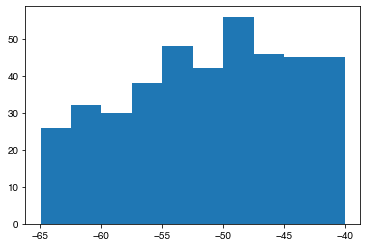

In [94]:
plt.hist(fermi_dec2)